<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Introduction" data-toc-modified-id="1.-Introduction-1">1. Introduction</a></span></li><li><span><a href="#2.-Environment-setup" data-toc-modified-id="2.-Environment-setup-2">2. Environment setup</a></span></li><li><span><a href="#3.-Data-Preparation" data-toc-modified-id="3.-Data-Preparation-3">3. Data Preparation</a></span><ul class="toc-item"><li><span><a href="#3.1-Sales-Data" data-toc-modified-id="3.1-Sales-Data-3.1">3.1 Sales Data</a></span><ul class="toc-item"><li><span><a href="#3.1.1-Data-import-and-PDA" data-toc-modified-id="3.1.1-Data-import-and-PDA-3.1.1">3.1.1 Data import and PDA</a></span></li><li><span><a href="#3.1.2-Data-Transformation" data-toc-modified-id="3.1.2-Data-Transformation-3.1.2">3.1.2 Data Transformation</a></span></li></ul></li><li><span><a href="#3.2-Store-Surrounding" data-toc-modified-id="3.2-Store-Surrounding-3.2">3.2 Store Surrounding</a></span><ul class="toc-item"><li><span><a href="#3.2.1-Data-import-and-PDA" data-toc-modified-id="3.2.1-Data-import-and-PDA-3.2.1">3.2.1 Data import and PDA</a></span></li><li><span><a href="#3.2.2-Data-Transformation" data-toc-modified-id="3.2.2-Data-Transformation-3.2.2">3.2.2 Data Transformation</a></span></li></ul></li><li><span><a href="#3.3-Single-Store-View" data-toc-modified-id="3.3-Single-Store-View-3.3">3.3 Single Store View</a></span><ul class="toc-item"><li><span><a href="#Data-Merge" data-toc-modified-id="Data-Merge-3.3.1">Data Merge</a></span></li><li><span><a href="#Feature-Extraction" data-toc-modified-id="Feature-Extraction-3.3.2">Feature Extraction</a></span></li><li><span><a href="#Filling-missing-values" data-toc-modified-id="Filling-missing-values-3.3.3">Filling missing values</a></span></li><li><span><a href="#Encoding-categorical-variables" data-toc-modified-id="Encoding-categorical-variables-3.3.4">Encoding categorical variables</a></span></li><li><span><a href="#Filter-Data-and-Plot-w/-and-w/o-Outliers" data-toc-modified-id="Filter-Data-and-Plot-w/-and-w/o-Outliers-3.3.5">Filter Data and Plot w/ and w/o Outliers</a></span></li></ul></li></ul></li><li><span><a href="#4.-EDA" data-toc-modified-id="4.-EDA-4">4. EDA</a></span></li><li><span><a href="#5.-Split-Training-and-Test-Sets" data-toc-modified-id="5.-Split-Training-and-Test-Sets-5">5. Split Training and Test Sets</a></span></li><li><span><a href="#6.-Feature-Engineering" data-toc-modified-id="6.-Feature-Engineering-6">6. Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#6.1-Visual-Inspection-Selection" data-toc-modified-id="6.1-Visual-Inspection-Selection-6.1">6.1 Visual Inspection Selection</a></span></li><li><span><a href="#6.2-Correlation-based-feature-selection" data-toc-modified-id="6.2-Correlation-based-feature-selection-6.2">6.2 Correlation based feature selection</a></span></li><li><span><a href="#6.3-Random-Forest-Feature-Importance-Selection" data-toc-modified-id="6.3-Random-Forest-Feature-Importance-Selection-6.3">6.3 Random Forest Feature Importance Selection</a></span></li><li><span><a href="#6.4-Feature-Scaling" data-toc-modified-id="6.4-Feature-Scaling-6.4">6.4 Feature Scaling</a></span></li></ul></li><li><span><a href="#7.-Modeling" data-toc-modified-id="7.-Modeling-7">7. Modeling</a></span><ul class="toc-item"><li><span><a href="#7.1-Modeling-dataset" data-toc-modified-id="7.1-Modeling-dataset-7.1">7.1 Modeling dataset</a></span></li><li><span><a href="#7.2-Model-Comparison" data-toc-modified-id="7.2-Model-Comparison-7.2">7.2 Model Comparison</a></span></li><li><span><a href="#7.3-Model-Evaluation" data-toc-modified-id="7.3-Model-Evaluation-7.3">7.3 Model Evaluation</a></span></li></ul></li></ul></div>

# 1. Introduction




This is the case study for PMI


2018-Aug-1
by Zhao, Jiayuan (Charlene)

# 2. Environment setup

In [0]:
# !pip install graphviz
# !pip install pydotplus
# !pip install graphviz
# !python -m pip install --upgrade pip
# !pip install --upgrade pandas
# !pip install --upgrade matplotlib

# Computing and data preparation
import numpy as np
import pandas as pd
import json
from pandas.io.json import json_normalize #package for flattening json in pandas df
from datetime import timedelta
from datetime import datetime
import time
import gc
import psutil
import random as rn
from contextlib import contextmanager


# Machine learning
import sklearn
from sklearn.preprocessing import LabelEncoder # sklearn preprocessing for dealing with categorical variables
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score

# Plotting
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pydotplus
import graphviz
from IPython.display import Image

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')


# 3. Data Preparation

## 3.1 Sales Data

### 3.1.1 Data import and PDA

In [6]:
s = pd.read_csv('sales_granular.csv')
s.tail()

,store_code,8/3/15 9:00,8/3/15 10:00,8/3/15 11:00,8/3/15 12:00,8/3/15 13:00,8/3/15 14:00,8/3/15 15:00,8/3/15 16:00,8/3/15 17:00,...,6/25/17 13:00,6/25/17 14:00,6/25/17 15:00,6/25/17 16:00,6/25/17 17:00,6/25/17 18:00,6/25/17 19:00,6/25/17 20:00,6/25/17 21:00,6/25/17 22:00
901,84223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
902,84351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
903,84608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,84658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,85011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,60.0,NaN,NaN,NaN,NaN,30.0,NaN,NaN,300.0,NaN


In [7]:
s['store_code']=s['store_code'].astype(str)

def df_pda(df):
    print (df.info())
    print (df.describe().T)
    print (df.columns.T)
    x_rowcount = df.shape[0] 
    print ('\nThere are ', x_rowcount, "rows in the file \n")
#     print (df.isnull())
    print ("\n",df.dtypes)
#     print ("\n",df.head(),"\n",df.tail())
    df.dtypes.value_counts()
    return

df_pda(s)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906 entries, 0 to 905
Columns: 11937 entries, store_code to 6/25/17 22:00
dtypes: float64(11936), object(1)
memory usage: 82.5+ MB
None
               count         mean         std    min    25%    50%     75%  \
8/3/15 9:00      1.0   300.000000         NaN  300.0  300.0  300.0   300.0   
8/3/15 10:00     5.0   570.000000  268.328157  300.0  300.0  600.0   750.0   
8/3/15 11:00     1.0   150.000000         NaN  150.0  150.0  150.0   150.0   
8/3/15 12:00     2.0   150.000000    0.000000  150.0  150.0  150.0   150.0   
8/3/15 13:00     6.0   180.000000  158.745079    0.0  150.0  150.0   150.0   
8/3/15 14:00     2.0   300.000000    0.000000  300.0  300.0  300.0   300.0   
8/3/15 15:00     4.0   390.000000  106.770783  300.0  300.0  375.0   465.0   
8/3/15 16:00     4.0   262.500000  143.614066  150.0  150.0  225.0   337.5   
8/3/15 17:00     3.0   480.000000  158.745079  300.0  420.0  540.0   570.0   
8/3/15 18:00     3.0   230.000000 

**Row dedup**

In [8]:
def df_dropdup(df):
    print ('before dedup:' + str(df.shape))
    df=df.drop_duplicates(subset=['store_code'],keep='first')
    print ('after dedup:'+str(df.shape))
    return df
s_dedup = df_dropdup(s)

before dedup:(906, 11937)
after dedup:(903, 11937)


In [9]:
s_dedup['dup']=s_dedup.duplicated(['store_code'])
s1_dup = s_dedup['dup'].sum()
print ('\nthere are', s1_dup ,'rows with duplicated store code')


there are 0 rows with duplicated store code


In [10]:
s1 = s_dedup.drop(columns='dup')
s1.head()


,store_code,8/3/15 9:00,8/3/15 10:00,8/3/15 11:00,8/3/15 12:00,8/3/15 13:00,8/3/15 14:00,8/3/15 15:00,8/3/15 16:00,8/3/15 17:00,...,6/25/17 13:00,6/25/17 14:00,6/25/17 15:00,6/25/17 16:00,6/25/17 17:00,6/25/17 18:00,6/25/17 19:00,6/25/17 20:00,6/25/17 21:00,6/25/17 22:00
0,10055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,30.0,60.0,150.0,600.0,NaN,NaN,NaN
4,10085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Column Dedup**

In [11]:
def col_dedup(df):
    cols = df.columns.tolist()
    seen = {}
    dupes = []

    for x in cols:
        if x not in seen:
            seen[x] = 1
        else:
            if seen[x] == 1:
                dupes.append(x)
            seen[x] += 1
    print ('\nColumns', dupes, 'are duplicated')

col_dedup(s1)


Columns [] are duplicated


### 3.1.2 Data Transformation 

** Hourly sales by store**

In [12]:
s2 =s1.set_index('store_code')
st = s2.stack()
st.index.names = ['store_code','time']
s3 = st.to_frame(name='sales')
s3.head()

sales
store_code time                
10055      4/26/16 15:00  300.0
           5/3/16 16:00    60.0
           5/7/16 13:00    30.0
           5/7/16 17:00    30.0
           5/9/16 17:00    90.0

In [13]:
df_pda(s3)
# There are some negative values in sales, likely due to good return - turned out to be ok as the negative amount didnt exceed the positive amount in any given store (shouwn in 3.1.4.4 'Store sales performance' section )

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 291542 entries, (10055, 4/26/16 15:00) to (85011, 6/25/17 21:00)
Data columns (total 1 columns):
sales    291542 non-null float64
dtypes: float64(1)
memory usage: 3.4+ MB
None
          count       mean         std     min   25%   50%    75%      max
sales  291542.0  218.76378  319.690434 -1200.0  30.0  90.0  300.0  12750.0
Index(['sales'], dtype='object')

There are  291542 rows in the file 


 sales    float64
dtype: object


In [14]:
s4=s3.reset_index()
s4.head()

,store_code,time,sales
0,10055,4/26/16 15:00,300.0
1,10055,5/3/16 16:00,60.0
2,10055,5/7/16 13:00,30.0
3,10055,5/7/16 17:00,30.0
4,10055,5/9/16 17:00,90.0


**Add data/time columns**

In [15]:
s4['Timestamp'] = [datetime.strptime(x, '%m/%d/%y %H:%M') for x in s4.time]
s4['Datetime'] = [x.date() for x in s4['Timestamp']]

def df_datetime(df,col):
    df['Year'] = [x.strftime( '%Y' ) for x in df[col]]
    df['Month'] = [x.strftime( '%m' ) for x in df[col]]
    df['Day'] = [x.strftime( '%d' ) for x in df[col]]
    df['Weekday'] = [x.strftime( '%w' ) for x in df[col]]
    df['YearMonth'] = [str(x.strftime( '%Y' ))+"-"+str(x.strftime( '%m' )) for x in df[col]]
    df['Weekofyear'] = [x.strftime( '%W' ) for x in df[col]]
    df['YearWeek'] = [str(x.strftime( '%Y' ))+"-"+str(x.strftime( '%W' )) for x in df[col]]
    df['Timeofday'] = [x.strftime( '%H' ) for x in df[col]]
    return df

s4 = df_datetime(s4,'Datetime') 
s4.head()

,store_code,time,sales,Timestamp,Datetime,Year,Month,Day,Weekday,YearMonth,Weekofyear,YearWeek,Timeofday
0,10055,4/26/16 15:00,300.0,2016-04-26 15:00:00,2016-04-26,2016,04,26,2,2016-04,17,2016-17,00
1,10055,5/3/16 16:00,60.0,2016-05-03 16:00:00,2016-05-03,2016,05,03,2,2016-05,18,2016-18,00
2,10055,5/7/16 13:00,30.0,2016-05-07 13:00:00,2016-05-07,2016,05,07,6,2016-05,18,2016-18,00
3,10055,5/7/16 17:00,30.0,2016-05-07 17:00:00,2016-05-07,2016,05,07,6,2016-05,18,2016-18,00
4,10055,5/9/16 17:00,90.0,2016-05-09 17:00:00,2016-05-09,2016,05,09,1,2016-05,19,2016-19,00


**Abnormal values**

In [0]:
### to avoid week 0 at the start of the year
s4['YearWeek']= s4['YearWeek'].apply(lambda x: '2016-52' if x == '2017-00' else x)
s4['YearWeek']= s4['YearWeek'].apply(lambda x: '2015-52' if x == '2016-00' else x)

**Daily sales by store**

In [17]:
agg1 = s4.groupby(['store_code', 'Datetime','YearWeek'])['sales'].sum().rename('sales')
agg2 = s4.groupby(['store_code', 'Datetime','YearWeek'])['sales'].count().rename('times')
sales_daily = pd.concat([agg1, agg2],axis=1).reset_index()
sales_daily['sales_days']=1
sales_daily.tail()

,store_code,Datetime,YearWeek,sales,times,sales_days
111544,85011,2017-06-21,2017-25,90.0,2,1
111545,85011,2017-06-22,2017-25,360.0,2,1
111546,85011,2017-06-23,2017-25,30.0,1,1
111547,85011,2017-06-24,2017-25,120.0,2,1
111548,85011,2017-06-25,2017-25,390.0,3,1


**Daily sales**

           stores          sales  avg_sales_by_store
count  693.000000     693.000000          693.000000
mean   160.965368   92032.943723          836.264696
std    146.403646   54909.794311          411.509786
min      5.000000    2010.000000          223.222749
25%     43.000000   44970.000000          475.102041
50%    114.000000   85710.000000          749.333333
75%    236.000000  136980.000000         1119.375000
max    525.000000  266070.000000         2274.375000


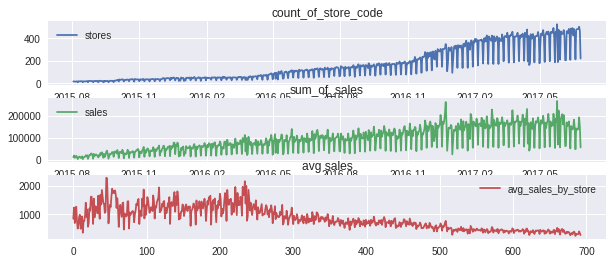

In [18]:
def plot_time(df,by,col):
    agg1 = df.groupby(by)[col[0]].count().rename('stores')
    agg2 = df.groupby(by)[col[1]].sum()
    fig, (axis1, axis2, axis3) = plt.subplots(3,1,figsize=(10,4))
    ax1 = agg1.plot(legend=True,ax=axis1,marker='',title="count_of_{}".format(col[0]))
    ax2 = agg2.plot(legend=True,ax=axis2,marker='',color='C1',title="sum_of_{}".format(col[1]))
    agg3 = pd.concat([agg1, agg2],axis=1).reset_index()
    agg3['avg_sales_by_store'] =agg3['sales']/agg3['stores']
    print(agg3.describe())
    ax3 = agg3['avg_sales_by_store'].plot(legend=True,ax=axis3,marker='',color='C2',title="avg sales")
    return(agg3)
    
plot1 = plot_time (sales_daily,'Datetime',['store_code','sales'])

In [19]:
df_pda(sales_daily)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111549 entries, 0 to 111548
Data columns (total 6 columns):
store_code    111549 non-null object
Datetime      111549 non-null object
YearWeek      111549 non-null object
sales         111549 non-null float64
times         111549 non-null int64
sales_days    111549 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 5.1+ MB
None
               count        mean          std    min   25%    50%    75%  \
sales       111549.0  571.756179  1104.473194 -540.0  60.0  180.0  600.0   
times       111549.0    2.613578     2.343185    1.0   1.0    2.0    3.0   
sales_days  111549.0    1.000000     0.000000    1.0   1.0    1.0    1.0   

                max  
sales       18660.0  
times          17.0  
sales_days      1.0  
Index(['store_code', 'Datetime', 'YearWeek', 'sales', 'times', 'sales_days'], dtype='object')

There are  111549 rows in the file 


 store_code     object
Datetime       object
YearWeek       object
sales    

**Weekly sales by store**

In [20]:
agg1 = sales_daily.groupby(['store_code','YearWeek'])['sales'].sum().rename('sales')
agg2 = sales_daily.groupby(['store_code','YearWeek'])['sales_days'].sum()
sales_weekly = pd.concat([agg1, agg2],axis=1).reset_index()
sales_weekly.tail()

,store_code,YearWeek,sales,sales_days
29881,85011,2017-21,1530.0,7
29882,85011,2017-22,1560.0,6
29883,85011,2017-23,540.0,3
29884,85011,2017-24,1920.0,7
29885,85011,2017-25,1050.0,6


**Weekly sales**

           stores         sales  avg_sales_by_store
count   99.000000  9.900000e+01           99.000000
mean   301.878788  6.442306e+05         3812.581263
std    277.245610  3.175187e+05         2139.394936
min     16.000000  6.822000e+04         1211.854839
25%     61.000000  4.032600e+05         1553.973176
50%    205.000000  6.261300e+05         3252.731707
75%    617.500000  9.267900e+05         5927.758985
max    767.000000  1.191750e+06         8301.000000


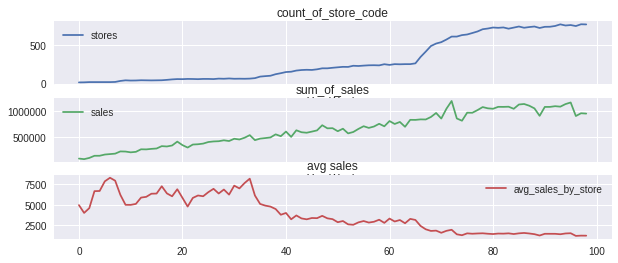

In [21]:

plot2 = plot_time (sales_weekly,'YearWeek',['store_code','sales'])


In [22]:
# Take sales data from the first week of 2017 where the trends 
# for both number of stores and average weekly sales are stabilized
agg1 = sales_daily.loc[sales_daily['YearWeek']>'2016-52'].groupby(['store_code','YearWeek'])['sales'].sum().rename('sales')
agg2 = sales_daily.loc[sales_daily['YearWeek']>'2016-52'].groupby(['store_code','YearWeek'])['sales_days'].sum()
sales_weekly = pd.concat([agg1, agg2],axis=1).reset_index()
sales_weekly.head()

,store_code,YearWeek,sales,sales_days
0,10055,2017-01,150.0,3
1,10055,2017-02,360.0,3
2,10055,2017-03,150.0,3
3,10055,2017-04,1020.0,4
4,10055,2017-05,1260.0,6


           stores         sales  avg_sales_by_store
count   25.000000  2.500000e+01           25.000000
mean   720.920000  1.037975e+06         1440.701828
std     37.600887  8.515522e+04          104.843423
min    627.000000  8.107200e+05         1211.854839
25%    712.000000  9.660000e+05         1421.544715
50%    726.000000  1.074750e+06         1475.098315
75%    744.000000  1.082670e+06         1507.869507
max    767.000000  1.163460e+06         1571.011080


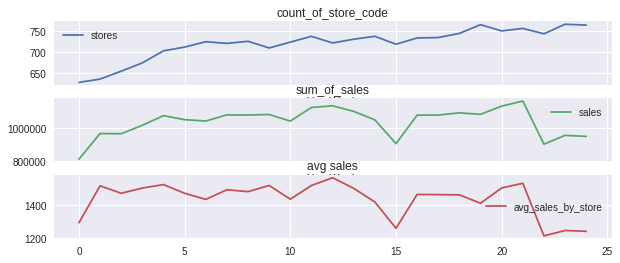

In [23]:
plot3 = plot_time (sales_weekly,'YearWeek',['store_code','sales'])


**Monthly sales by store**

excluded as weekly sales is considered more appropriate *

**Store performance at weekly timeframe**

In [24]:
def agg_storestats(df,by,col='sales'):  
    agg1 = df.groupby(by)[col].mean().rename('avgWeeklysales')
    agg2 = df.groupby(by)[col].sum().rename('sumWeeklysales')
    agg3 = df.groupby(by)['sales_days'].mean().rename('avg_sales_days_perweek')
    agg4 = df.groupby(by)['sales_days'].count().rename('sales_week')
    agg5 = pd.concat([agg1, agg2,agg3,agg4],axis=1).reset_index()
    return (agg5)

store_sales = agg_storestats(sales_weekly,['store_code'])  
store_sales.head()

,store_code,avgWeeklysales,sumWeeklysales,avg_sales_days_perweek,sales_week
0,10055,519.6,12990.0,3.800000,25
1,10077,255.0,3570.0,2.071429,14
2,10079,4618.8,115470.0,5.720000,25
3,10081,8601.6,215040.0,6.960000,25
4,10085,1542.0,38550.0,6.320000,25


In [25]:
df_pda(store_sales)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903 entries, 0 to 902
Data columns (total 5 columns):
store_code                903 non-null object
avgWeeklysales            903 non-null float64
sumWeeklysales            903 non-null float64
avg_sales_days_perweek    903 non-null float64
sales_week                903 non-null int64
dtypes: float64(3), int64(1), object(1)
memory usage: 35.4+ KB
None
                        count          mean           std  min          25%  \
avgWeeklysales          903.0   1194.473869   3066.281911  0.0   164.028340   
sumWeeklysales          903.0  28736.843854  76762.406358  0.0  2640.000000   
avg_sales_days_perweek  903.0      3.241075      1.714735  1.0     1.755952   
sales_week              903.0     19.959025      6.820431  1.0    17.000000   

                                50%           75%       max  
avgWeeklysales           325.263158    847.971429   33910.8  
sumWeeklysales          7020.000000  20325.000000  847770.0  
avg_sales_days

**Adding candidate target variables to store performance at weekly timeframe**

In [26]:
mean_sales = store_sales['avgWeeklysales'].mean()
mean_days = store_sales['avg_sales_days_perweek'].mean()
store_sales['seg1'] =store_sales['avgWeeklysales'].apply(lambda x: 'H' if x>mean_sales else 'L')
store_sales['seg2'] =store_sales['avg_sales_days_perweek'].apply(lambda x: 'H' if x>mean_days else 'L')
store_sales['seg3'] =store_sales['seg1']+store_sales['seg2']
store_sales['target1']=store_sales['seg3'].apply(lambda x: '03:H' if x == 'HH' else '01:L' if x=='LL' else '02:M')
store_sales['target2']=store_sales['target1'].apply(lambda x: 1 if x == '03:H' else 0)
store_sales['target3']=store_sales['target1'].apply(lambda x: 0 if x == '01:L' else 1)
store_sales.head()

,store_code,avgWeeklysales,sumWeeklysales,avg_sales_days_perweek,sales_week,seg1,seg2,seg3,target1,target2,target3
0,10055,519.6,12990.0,3.800000,25,L,H,LH,02:M,0,1
1,10077,255.0,3570.0,2.071429,14,L,L,LL,01:L,0,0
2,10079,4618.8,115470.0,5.720000,25,H,H,HH,03:H,1,1
3,10081,8601.6,215040.0,6.960000,25,H,H,HH,03:H,1,1
4,10085,1542.0,38550.0,6.320000,25,H,H,HH,03:H,1,1


In [27]:
store_sales=store_sales.drop(columns=['seg1','seg2','seg3'])
print(store_sales.pivot_table(values = ['avgWeeklysales','avg_sales_days_perweek'],index =['target1'],margins=True, fill_value =0))
print(store_sales.pivot_table( ['avgWeeklysales'],index =['target1'],aggfunc=len,margins=True, fill_value =0))

         avgWeeklysales  avg_sales_days_perweek
target1                                        
01:L         222.095011                1.950267
02:M         610.406164                4.227215
03:H        4713.391747                5.782655
All         1194.473869                3.241075
         avgWeeklysales
target1                
01:L                512
02:M                214
03:H                177
All                 903


## 3.2 Store Surrounding 

### 3.2.1 Data import and PDA

In [28]:
#load json object
with open('Surroundings.json') as f:
    d = json.load(f)
    
#lets put the data into a pandas df
df = json_normalize(d)
df['store_code'] = df['store_code'].apply(str)
df.head()


,store_code,surroundings.accounting,surroundings.airport,surroundings.amusement_park,surroundings.aquarium,surroundings.art_gallery,surroundings.atm,surroundings.bakery,surroundings.bank,surroundings.bar,...,surroundings.store,surroundings.subway_station,surroundings.synagogue,surroundings.taxi_stand,surroundings.train_station,surroundings.transit_station,surroundings.travel_agency,surroundings.university,surroundings.veterinary_care,surroundings.zoo
0,10055,[{'name': 'Fiduciaire Exacte & Gestion Comptab...,[],[],[],"[{'website': 'http://www.onegeeinfog.com/', 'n...","[{'website': 'https://www.ubs.com/ch/fr.html',...","[{'name': 'Mconseils SA', 'place_id': 'ChIJRz1...","[{'website': 'http://www.ubs.ch/', 'rating': 5...","[{'rating': 3.5, 'place_id': 'ChIJ8xHdm_1vjEcR...",...,[{'website': 'https://filialen.migros.ch/de/mi...,[],[],[],[],"[{'name': 'Chêne-Bourg, La Mousse', 'place_id'...","[{'name': 'Courir au Népal Sàrl', 'place_id': ...",[],[{'website': 'http://www.vet-chene-bougeries.c...,[]
1,10077,[],[],[],[],[],[],"[{'rating': 4.8, 'place_id': 'ChIJM8FbQe9vjEcR...",[],[],...,[{'website': 'http://www.coop.ch/fr/services/a...,[],[],[],[],"[{'name': 'Chêne-Bougeries, Montagne', 'place_...",[],[],[],[]
2,10079,[{'website': 'http://www.vd.ch/autorites/depar...,[],[],[],[],"[{'name': 'PickPost-Stelle', 'opening_hours': ...",[{'website': 'https://filialen.migros.ch/de/ta...,"[{'website': 'https://www.ubs.com/ch/fr.html',...",[{'website': 'https://www.facebook.com/Highlan...,...,"[{'website': 'http://www.denner.ch/', 'rating'...",[],[],[],[],"[{'name': 'Yverdon-les-Bains, Bel-Air', 'place...","[{'website': 'http://www.hotelplan.ch/FR/', 'r...",[],[],[]
3,10086,[],[],[],[],[],[],[],[],"[{'website': 'http://www.oubangui.com/', 'rati...",...,"[{'rating': 3.3, 'place_id': 'ChIJUW-HLeAxjEcR...",[],[],[],[],"[{'name': 'Bois-Gentil', 'place_id': 'ChIJK8fw...",[],[],[],[]
4,10111,[],[],[],[],[],[],[],[],[],...,"[{'name': 'lookemontre.com', 'opening_hours': ...",[],[],[],[],"[{'name': 'Yverdon-les-Bains, Plaisance', 'pla...",[],[],[],[]


**Row dedup**

In [29]:
df1 = df_dropdup(df)

before dedup:(546, 90)
after dedup:(545, 90)


In [30]:
df1['dup']=df1.duplicated(['store_code'])
df1_dup = df1['dup'].sum()
print ('\nthere are', df1_dup ,'rows with duplicated store code')
df1=df1.drop(columns='dup')


there are 0 rows with duplicated store code


**Column dedup**

In [31]:
col_dedup(df1)


Columns [] are duplicated


### 3.2.2 Data Transformation

**Store descriptions at surroundings level**

In [32]:
df1=df1.set_index('store_code')
df2=df1.stack()
df2.index.names = ['store_code','surroundings']
df3 = df2.to_frame(name='descriptions')
df3.head()

descriptions
store_code surroundings                                                                  
10055      surroundings.accounting      [{'name': 'Fiduciaire Exacte & Gestion Comptab...
           surroundings.airport                                                        []
           surroundings.amusement_park                                                 []
           surroundings.aquarium                                                       []
           surroundings.art_gallery     [{'website': 'http://www.onegeeinfog.com/', 'n...

**Store descriptions at surroundings.business level**

In [33]:
df4 = pd.concat([pd.DataFrame(x) for x in df3['descriptions']],keys=df3.index)
df4.index.names =['store_code','business_type','business_no']
df5 = df4.reset_index()
df5.head()

,store_code,business_type,business_no,address_components,formatted_address,icon,international_phone_number,latitude,longitude,name,opening_hours,place_id,price_level,rating,reviews,types,user_ratings_total,website
0,10055,surroundings.accounting,0,"[{'long_name': '6', 'types': ['street_number']...","Rue de Genève 6, 1225 Chêne-Bourg, Switzerland",https://maps.gstatic.com/mapfiles/place_api/ic...,+41 22 348 55 28,46.195035,6.192835,Fiduciaire Exacte & Gestion Comptable Isotton ...,"{'weekday_text': ['Monday: 9:00 AM – 5:00 PM',...",ChIJySk3ff1vjEcR0luLshdJijg,NaN,NaN,NaN,"[accounting, finance, point_of_interest, estab...",NaN,NaN
1,10055,surroundings.accounting,1,"[{'long_name': '18', 'types': ['street_number'...","Rue de Genève 18, 1225 Geneve - Chene Bourg, S...",https://maps.gstatic.com/mapfiles/place_api/ic...,+41 22 342 27 01,46.194468,6.194001,Eurex Suisse,NaN,ChIJWd4DcNt6jEcRfP0dHwMZr88,NaN,NaN,NaN,"[accounting, finance, point_of_interest, estab...",NaN,http://www.eurex.swiss/
2,10055,surroundings.accounting,2,"[{'long_name': '13', 'types': ['street_number'...","Rue du Vieux-Chêne 13, 1224 Chêne-Bougeries, S...",https://maps.gstatic.com/mapfiles/place_api/ic...,+41 79 561 99 39,46.195345,6.191545,Compta-Magda Sàrl,"{'weekday_text': ['Monday: 9:00 AM – 5:30 PM',...",ChIJE0A1j_1vjEcR1Vv1H1M6hEU,NaN,NaN,NaN,"[accounting, finance, point_of_interest, estab...",NaN,http://www.compta-magda.ch/
3,10055,surroundings.art_gallery,0,"[{'long_name': '25', 'types': ['street_number'...","Rue de Genève 25, 1225 Chêne-Bourg, Switzerland",https://maps.gstatic.com/mapfiles/place_api/ic...,NaN,46.194393,6.195039,One Gee In Fog,NaN,ChIJ7YfhUh1wjEcRT6flX_wm1Lw,NaN,NaN,NaN,"[art_gallery, point_of_interest, establishment]",NaN,http://www.onegeeinfog.com/
4,10055,surroundings.atm,0,"[{'long_name': '18', 'types': ['street_number'...","Rue de Genève 18, 1225 Chêne-Bourg, Switzerland",https://maps.gstatic.com/mapfiles/place_api/ic...,+41 22 869 25 88,46.194382,6.194029,UBS Financial Services Inc.,"{'weekday_text': ['Monday: 9:00 AM – 5:00 PM',...",ChIJSdtepAJwjEcRVpHJRfIK37M,NaN,3.1,"[{'rating': 4, 'author_name': 'mar lmt', 'lang...","[bank, atm, finance, point_of_interest, establ...",7.0,https://www.ubs.com/ch/fr.html


**Add Location information**

In [0]:
addresses = pd.concat([pd.DataFrame(x) for x in df5['address_components']],keys=df4.index)
#addresses.head()
addresses['types2'] = [x[0] for x in addresses['types']]
loc_country = np.where(addresses['types2']=='country')[0]
country = addresses.iloc[loc_country]['long_name'].to_frame(name='country')
country.index.names =['store_code','business_type','business_no','Attribute#']
country = country.reset_index().drop('Attribute#',axis=1)

In [0]:
loc_city = np.where(addresses['types2']=='administrative_area_level_1')[0]
city = addresses.iloc[loc_city]['long_name'].to_frame(name='city')
city.index.names =['store_code','business_type','business_no','Attribute#']
city = city.reset_index().drop('Attribute#',axis=1)

In [0]:
Location = pd.merge(country, city)
df5['country'] = Location['country']
df5['city'] = Location['city']

In [0]:
city_percent = (df5['city'].value_counts() / len(df5)).to_frame().reset_index()
city_list = city_percent['index'].loc[city_percent['city']>0.05].tolist()
City_main = []
for x in df5['city']:
   #   print(x)
    if x not in city_list:
        City_main.append('others')
    else:
        City_main.append(x)
df5['City_main'] = City_main

In [38]:
df5['City_main'].value_counts() / len(df5)

others          0.369032
Zürich          0.157383
Bern            0.142838
Vaud            0.064318
Aargau          0.056585
Basel-Stadt     0.056291
Sankt Gallen    0.052486
Ticino          0.050951
Luzern          0.050117
Name: City_main, dtype: float64

**Add Review information**

In [0]:
df5['reviews']= df5['reviews'].fillna("")
df5['number_review'] = [len(x) for x in df5['reviews']]

**Add Language information**

In [0]:
def find_lan(x):
    lan =[]
    if x == '':
        return lan
    else:
        for i in range(len(x)):
            if 'language' in x[i].keys():
                l = x[i]['language']
                lan.append(l)
        return lan

# find_lan(df5['reviews'][4])
df5['lanc'] = [find_lan(x) for x in df5['reviews']]
# df5['lanc'].head(10)

In [41]:
df5.head()

,store_code,business_type,business_no,address_components,formatted_address,icon,international_phone_number,latitude,longitude,name,...,rating,reviews,types,user_ratings_total,website,country,city,City_main,number_review,lanc
0,10055,surroundings.accounting,0,"[{'long_name': '6', 'types': ['street_number']...","Rue de Genève 6, 1225 Chêne-Bourg, Switzerland",https://maps.gstatic.com/mapfiles/place_api/ic...,+41 22 348 55 28,46.195035,6.192835,Fiduciaire Exacte & Gestion Comptable Isotton ...,...,NaN,,"[accounting, finance, point_of_interest, estab...",NaN,NaN,Switzerland,Genève,others,0,[]
1,10055,surroundings.accounting,1,"[{'long_name': '18', 'types': ['street_number'...","Rue de Genève 18, 1225 Geneve - Chene Bourg, S...",https://maps.gstatic.com/mapfiles/place_api/ic...,+41 22 342 27 01,46.194468,6.194001,Eurex Suisse,...,NaN,,"[accounting, finance, point_of_interest, estab...",NaN,http://www.eurex.swiss/,Switzerland,Genève,others,0,[]
2,10055,surroundings.accounting,2,"[{'long_name': '13', 'types': ['street_number'...","Rue du Vieux-Chêne 13, 1224 Chêne-Bougeries, S...",https://maps.gstatic.com/mapfiles/place_api/ic...,+41 79 561 99 39,46.195345,6.191545,Compta-Magda Sàrl,...,NaN,,"[accounting, finance, point_of_interest, estab...",NaN,http://www.compta-magda.ch/,Switzerland,Genève,others,0,[]
3,10055,surroundings.art_gallery,0,"[{'long_name': '25', 'types': ['street_number'...","Rue de Genève 25, 1225 Chêne-Bourg, Switzerland",https://maps.gstatic.com/mapfiles/place_api/ic...,NaN,46.194393,6.195039,One Gee In Fog,...,NaN,,"[art_gallery, point_of_interest, establishment]",NaN,http://www.onegeeinfog.com/,Switzerland,Genève,others,0,[]
4,10055,surroundings.atm,0,"[{'long_name': '18', 'types': ['street_number'...","Rue de Genève 18, 1225 Chêne-Bourg, Switzerland",https://maps.gstatic.com/mapfiles/place_api/ic...,+41 22 869 25 88,46.194382,6.194029,UBS Financial Services Inc.,...,3.1,"[{'rating': 4, 'author_name': 'mar lmt', 'lang...","[bank, atm, finance, point_of_interest, establ...",7.0,https://www.ubs.com/ch/fr.html,Switzerland,Genève,others,5,"[en, fr, fr, fr, fr]"


In [0]:
df_lan =  pd.get_dummies(pd.DataFrame(df5['lanc'].tolist(),index=df4.index).stack()).sum(level=0)  
df5 = df5.set_index('store_code')
df5 = pd.merge(df5, df_lan,left_index=True, right_index=True)

**Add Opening Hours information**

In [0]:
Open_hours = []
for i in df5['opening_hours']:
    if pd.isnull(i):
        Open_hours.append([])
    else:
        Open_hours.append(i['periods'])
df5['open_hours'] = Open_hours

In [0]:
df5 = df5.reset_index()
list_dict = []
for i in df5['open_hours']:
    if i !=[]:
        dict = {}
        week_list = []
        for j in range(0,len(i)):
            D = i[j]['open']['day']
            week_list.append(D)
            dict['weekday_{}_start'.format(D)] = i[j]['open']['time']
            try:
                dict['weekday_{}_end'.format(D)] = i[j]['close']['time']
            except:
                dict['weekday_{}_end'.format(D)] =''
        for k in range(0,7):
            if k not in week_list:
                dict['weekday_{}_start'.format(k)] = ''
                dict['weekday_{}_end'.format(k)] = ''
                dict['Close_{}'.format(k)] = 'yes'
        list_dict.append(dict)
    else:
        dict = {}
        for k in range(0,7):
            dict['weekday_{}_start'.format(k)] =''
            dict['weekday_{}_end'.format(k)]=''
        list_dict.append(dict)   


In [0]:
df5['dict'] = list_dict
df5 = df5.set_index('store_code')
df5 = pd.concat([df5.drop(['dict'], axis=1), df5['dict'].apply(pd.Series)], axis=1)
# df5 = df5.fillna('')

**Putting all together**

In [46]:
df6 = df5.drop(['city','open_hours','reviews','types','place_id','opening_hours','address_components', 'formatted_address','icon','international_phone_number','website','latitude','longitude','name'], axis=1)
# df6 = df6.fillna('')
df6['price_level'] = pd.to_numeric(df6['price_level'])
df6['rating'] = pd.to_numeric(df6['rating'])
df6['user_ratings_total'] = pd.to_numeric(df6['user_ratings_total'])
df6 = df6.reset_index()
df6.head()

,store_code,business_type,business_no,price_level,rating,user_ratings_total,country,City_main,number_review,lanc,...,weekday_2_end,weekday_2_start,weekday_3_end,weekday_3_start,weekday_4_end,weekday_4_start,weekday_5_end,weekday_5_start,weekday_6_end,weekday_6_start
0,10055,surroundings.accounting,0,NaN,NaN,NaN,Switzerland,others,0,[],...,1700,0900,1700,0900,1700,0900,1700,0900,,
1,10055,surroundings.accounting,1,NaN,NaN,NaN,Switzerland,others,0,[],...,,,,,,,,,,
2,10055,surroundings.accounting,2,NaN,NaN,NaN,Switzerland,others,0,[],...,1730,0900,1730,0900,1730,0900,1730,0900,,
3,10055,surroundings.art_gallery,0,NaN,NaN,NaN,Switzerland,others,0,[],...,,,,,,,,,,
4,10055,surroundings.atm,0,NaN,3.1,7.0,Switzerland,others,5,"[en, fr, fr, fr, fr]",...,1700,0900,1700,0900,1700,0900,1700,0900,,


**Deriving store level information**

In [0]:
#Aggregate business type to store_code level
store_df =  pd.get_dummies(pd.DataFrame(df6['business_type'].tolist(),index=df4.index).stack()).sum(level=0)    

#take first country and address of the store_code as they should all be the same
store_df['country'] = df6.groupby('store_code')['country'].first()
store_df['City_main'] = df6.groupby('store_code')['City_main'].first()

#take avg or count of other columns to store_code level
store_df['number_of_reviews'] = df6.groupby(['store_code'])['number_review'].agg(sum)
store_df['number_of_surroundings'] = df6.groupby(['store_code'])['store_code'].count()
store_df['rating'] = df6.groupby(['store_code'])['rating'].sum()/ df6.groupby(['store_code'])['user_ratings_total'].count()
store_df['user_ratings_total'] = df6.groupby(['store_code'])['user_ratings_total'].sum()/df6.groupby(['store_code'])['rating'].count()
store_df['avg_price_level'] = df6.groupby(['store_code'])['price_level'].sum()/df6.groupby(['store_code'])['price_level'].count()
for i in range (7):
    store_df['Close_{}'.format(i)] = df6[df6['Close_{}'.format(i)] == 'yes'].groupby(['store_code'])['Close_{}'.format(i)].count() / store_df['number_of_surroundings']

store_df['avg_close_day'] = store_df[['Close_0', 'Close_1','Close_2','Close_3','Close_4','Close_5','Close_6']].sum(axis=1)

df_lan =  pd.get_dummies(pd.DataFrame(df5['lanc'].tolist(),index=df4.index).stack()).sum(level=0)  
# df_lan = df_lan.set_index('store_code')
dfT = df_lan.T
col_list = dfT.columns.tolist()
# dfT.head()

In [48]:
store_df.head()

,surroundings.accounting,surroundings.airport,surroundings.amusement_park,surroundings.aquarium,surroundings.art_gallery,surroundings.atm,surroundings.bakery,surroundings.bank,surroundings.bar,surroundings.beauty_salon,...,user_ratings_total,avg_price_level,Close_0,Close_1,Close_2,Close_3,Close_4,Close_5,Close_6,avg_close_day
store_code,,,,,,,,,,,,,,,,,,,,,
10055,3,0,0,0,1,1,3,3,1,4,...,7.974684,NaN,0.410714,0.071429,0.005952,0.023810,0.005952,0.011905,0.142857,0.672619
10077,0,0,0,0,0,0,1,0,0,0,...,8.444444,NaN,0.444444,0.111111,NaN,NaN,NaN,NaN,0.055556,0.611111
10079,1,0,0,0,0,3,3,1,4,4,...,12.305556,1.0,0.544503,0.057592,0.010471,0.010471,0.020942,0.015707,0.078534,0.738220
10086,0,0,0,0,0,0,0,0,1,2,...,5.470588,NaN,0.240000,0.120000,0.040000,0.040000,0.040000,0.040000,0.080000,0.600000
10111,0,0,0,0,0,0,0,0,0,0,...,36.454545,NaN,0.217391,NaN,NaN,0.043478,NaN,NaN,0.130435,0.391304


In [0]:
maximum_indices_list = {}
# dfT = dfT.reset_index()
for x in col_list:
    A = np.array(dfT[x])
    maximum_indices = np.where(A==dfT[x].max(axis=0))
    maximum_indices_list[x] = dfT.iloc[maximum_indices].index.values.tolist()
# maximum_indices_list 

Max_lan = pd.Series(maximum_indices_list, name='Mostlyspeaking_lan')
# Max_lan = Max_lan.reset_index()
# Max_lan.set_index('store_code')
# Max_lan.index.names =['store_code']

In [50]:
store_df1 = pd.concat([store_df,Max_lan],axis=1)
df_pda(store_df1)

<class 'pandas.core.frame.DataFrame'>
Index: 537 entries, 10055 to 47724
Columns: 103 entries, surroundings.accounting to Mostlyspeaking_lan
dtypes: float64(11), int64(2), object(3), uint8(87)
memory usage: 136.9+ KB
None
                                 count        mean         std       min  \
surroundings.accounting          537.0    0.836127    1.697001  0.000000   
surroundings.airport             537.0    0.007449    0.086065  0.000000   
surroundings.amusement_park      537.0    0.007449    0.105539  0.000000   
surroundings.aquarium            537.0    0.001862    0.043153  0.000000   
surroundings.art_gallery         537.0    0.722533    2.091943  0.000000   
surroundings.atm                 537.0    2.094972    2.348450  0.000000   
surroundings.bakery              537.0    1.774674    2.277295  0.000000   
surroundings.bank                537.0    3.197393    4.629778  0.000000   
surroundings.bar                 537.0    3.324022    6.489892  0.000000   
surroundings.beaut

In [51]:
import re
store_df1['Mostlyspeaking_lan'] = [re.sub('[^A-Za-z0-9]+', '', str(x)) for x in store_df1['Mostlyspeaking_lan']]
store_df1['Mostlyspeaking_lan'].value_counts() / len(store_df1)

de      0.670391
fr      0.147114
en      0.113594
it      0.055866
deen    0.005587
frpt    0.001862
defr    0.001862
ro      0.001862
es      0.001862
Name: Mostlyspeaking_lan, dtype: float64

In [52]:
top_lan = []
for x in store_df1['Mostlyspeaking_lan']:
#   print(x)
    if x not in ['en','fr','de']:
        top_lan.append('cell 48others')
    else:
        top_lan.append(x)
store_df1['Mostlyspeaking_language'] = top_lan
store_df1['Mostlyspeaking_language'].value_counts() / len(store_df1)

de               0.670391
fr               0.147114
en               0.113594
cell 48others    0.068901
Name: Mostlyspeaking_language, dtype: float64

## 3.3 Single Store View

### Data Merge

In [0]:
# Function to calculate missing values by column 
def df_mis_val(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table = mis_val_table[mis_val_table.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table

In [54]:
ads = pd.merge(store_sales,store_df1,how='left',left_on = 'store_code',right_index=True)
# print(ads.head())
df_mis_val(ads)

Your selected dataframe has 112 columns.
There are 104 columns that have missing values.


,Missing Values,% of Total Values
avg_price_level,745,82.5
Close_5,504,55.8
Close_4,490,54.3
Close_3,479,53.0
Close_2,473,52.4
Close_1,411,45.5
Close_6,398,44.1
Close_0,383,42.4
country,373,41.3
surroundings.post_office,372,41.2


In [55]:
# pick only stores with surroundings information for analysis
ads1 = pd.merge(store_sales,store_df1,how='inner',left_on = 'store_code',right_index=True)
ads1.head()
print(ads1.shape)

(531, 112)


### Feature Extraction

In [0]:
ads1['reviews_per_surrounding'] = ads1['number_of_reviews']/ads1['number_of_surroundings']
ads1['rating_per_review'] = ads1['rating']/ads1['number_of_reviews']
ads1['ratingtotal_per_review'] = ads1['user_ratings_total']/ads1['number_of_reviews']

In [57]:
ads1.shape

(531, 115)

### Filling missing values

In [58]:
df_mis_val(ads1)

Your selected dataframe has 115 columns.
There are 9 columns that have missing values.


,Missing Values,% of Total Values
avg_price_level,373,70.2
Close_5,132,24.9
Close_4,118,22.2
Close_3,107,20.2
Close_2,101,19.0
Close_1,39,7.3
Close_6,26,4.9
Close_0,11,2.1
country,1,0.2


In [59]:
def df_cat_val (df):
    for col in df:
        if df[col].dtype == 'object':
            df[col].fillna('')
    print (df.select_dtypes(include = ['object']).apply(pd.Series.nunique, axis =0))
    return df
ads1=df_cat_val(ads1)
#can drop column 'Country' since there is only one unique values

store_code                 531
target1                      3
country                      1
City_main                    9
Mostlyspeaking_lan           9
Mostlyspeaking_language      4
dtype: int64


In [60]:
ads2 =ads1.drop(columns=['sales_week','country', 'avg_price_level','Mostlyspeaking_lan']).set_index('store_code')
df_mis_val(ads2)

Your selected dataframe has 110 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
Close_5,132,24.9
Close_4,118,22.2
Close_3,107,20.2
Close_2,101,19.0
Close_1,39,7.3
Close_6,26,4.9
Close_0,11,2.1


In [61]:
ads2 =ads2.fillna(0)

df_mis_val(ads2)

Your selected dataframe has 110 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


### Encoding categorical variables

In [62]:
obj_df = ads2[['City_main','Mostlyspeaking_language']]
obj_list = obj_df.columns.values.tolist()
ads3 = pd.get_dummies(ads2, columns=obj_list)
ads3.head()

,avgWeeklysales,sumWeeklysales,avg_sales_days_perweek,target1,target2,target3,surroundings.accounting,surroundings.airport,surroundings.amusement_park,surroundings.aquarium,...,City_main_Luzern,City_main_Sankt Gallen,City_main_Ticino,City_main_Vaud,City_main_Zürich,City_main_others,Mostlyspeaking_language_cell 48others,Mostlyspeaking_language_de,Mostlyspeaking_language_en,Mostlyspeaking_language_fr
store_code,,,,,,,,,,,,,,,,,,,,,
10055,519.600000,12990.0,3.800000,02:M,0,1,3,0,0,0,...,0,0,0,0,0,1,0,0,0,1
10077,255.000000,3570.0,2.071429,01:L,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
10079,4618.800000,115470.0,5.720000,03:H,1,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
10086,1536.818182,33810.0,6.409091,03:H,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
10111,857.142857,18000.0,5.047619,02:M,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [0]:
def plot_hist (df,target):

    # Set the style of plots
    plt.style.use('fivethirtyeight')
    
    # Plot the distribution    
    plt.hist(df[target], edgecolor = 'k', bins = 20)
    plt.title(target); plt.xlabel('Values'); plt.ylabel('Count');

### Filter Data and Plot w/ and w/o Outliers

In [0]:
remove_outlier_list = ['avgWeeklysales','user_ratings_total','rating_per_review']

avgWeeklysales


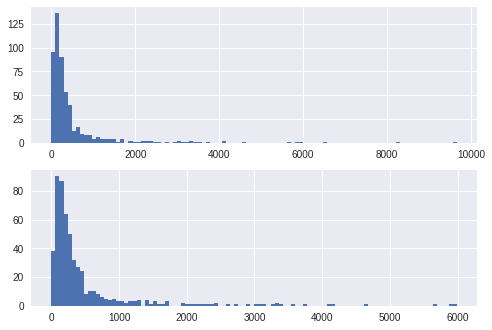

user_ratings_total


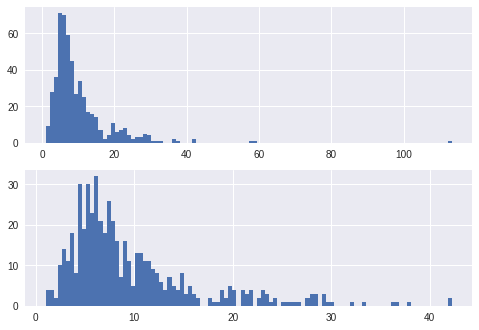

rating_per_review


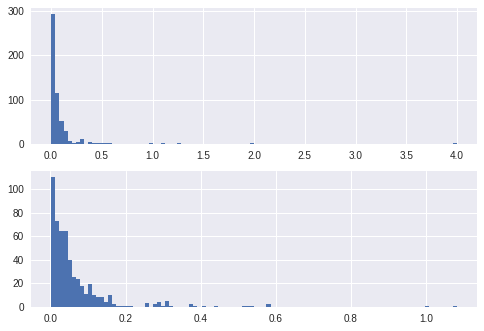

In [65]:
for col in remove_outlier_list:
    print(col)
    fig, (ax0, ax1) = plt.subplots(nrows=2)
    ads3[col].hist(bins=100, ax=ax0)
    q = ads3[col].quantile(0.995)
    ads3 = ads3[ads3[col] < q]
    ads3[col].hist(bins=100)
    plt.show()

In [66]:
print(ads2.shape)
print(ads3.shape)

(531, 110)
(522, 121)


In [0]:
# plot_hist(ads3,'rating_per_review')
ads3_filtered = ads3

# 4. EDA

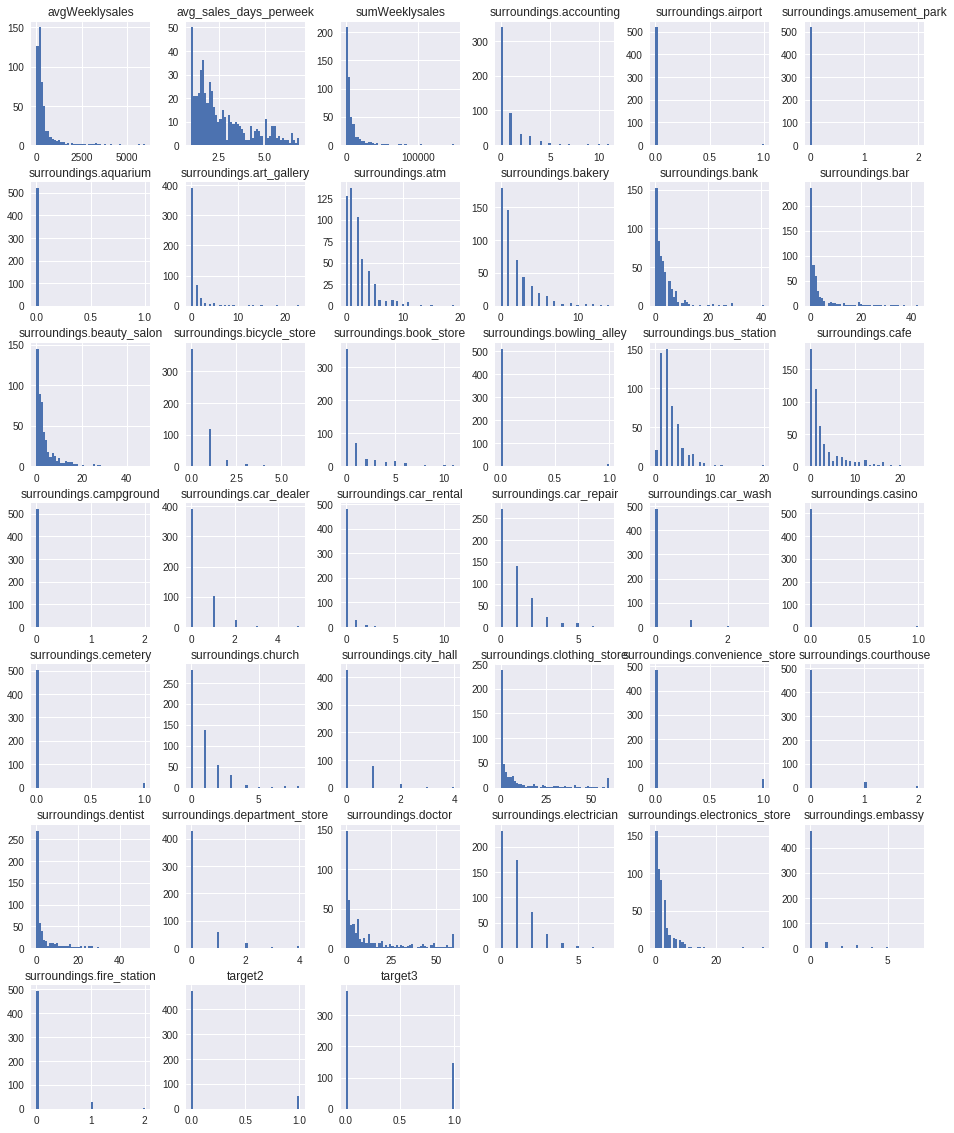

In [68]:
%matplotlib inline  
ads3_filtered.iloc[:,:40].hist(bins = 50 , figsize = (16,20))
plt.show()

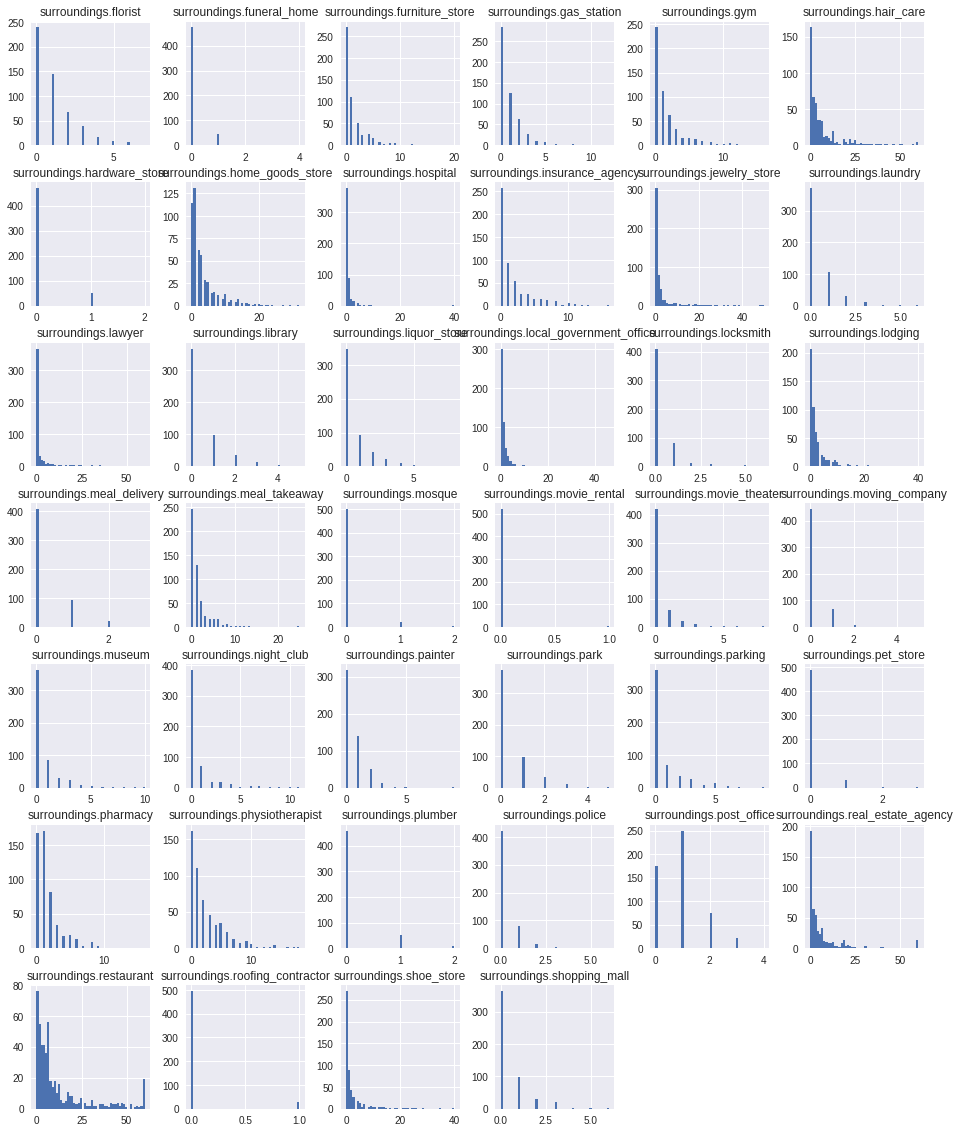

In [69]:
%matplotlib inline  
ads3_filtered.iloc[:,40:80].hist(bins = 50 , figsize = (16,20))
plt.show()

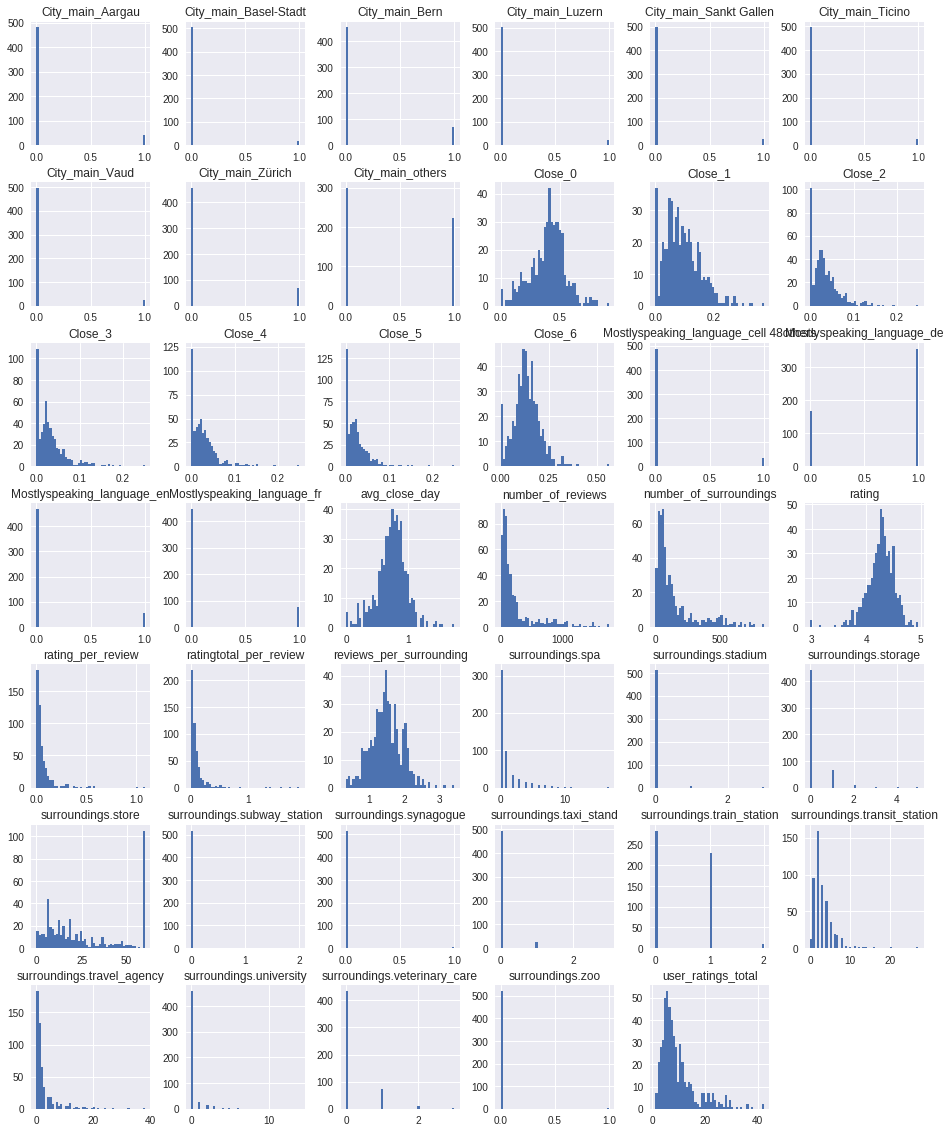

In [70]:
%matplotlib inline  
ads3_filtered.iloc[:,80:].hist(bins = 50 , figsize = (16,20))
plt.show()

# 5. Split Training and Test Sets

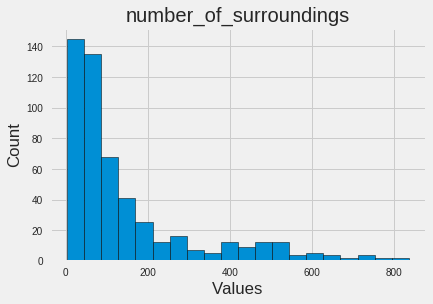

In [71]:
plot_hist(ads3_filtered,'number_of_surroundings')

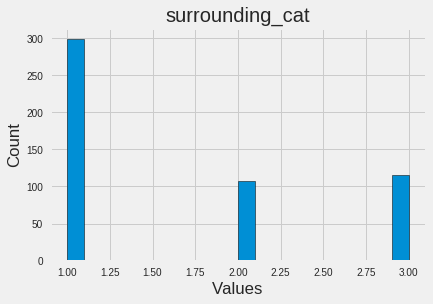

In [72]:
#use one variable for stratified sampling
ads3_filtered['number_of_surroundings'].describe()
ads3_filtered['surrounding_cat'] = np.ceil(ads3_filtered['number_of_surroundings']/100)
ads3_filtered['surrounding_cat'].where(ads3_filtered['surrounding_cat'] <3, 3.0, inplace=True)
plot_hist(ads3_filtered,'surrounding_cat')

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(ads3_filtered,ads3_filtered['surrounding_cat']):
    strat_train_set = ads3_filtered.iloc[train_index]
    strat_test_set = ads3_filtered.iloc[test_index]

In [74]:
strat_test_set['surrounding_cat'].value_counts() / len(strat_test_set)


1.0    0.571429
3.0    0.219048
2.0    0.209524
Name: surrounding_cat, dtype: float64

In [75]:
ads3_filtered['surrounding_cat'].value_counts() / len(ads3)

1.0    0.572797
3.0    0.222222
2.0    0.204981
Name: surrounding_cat, dtype: float64

In [0]:
#remove created attribute for stratified sampling
for set_ in (strat_train_set, strat_test_set):
    set_.drop('surrounding_cat',axis =1, inplace=True)

In [77]:
print('shape of train set: '+str(strat_train_set.shape))
print('shape of test set: '+str(strat_test_set.shape))

shape of train set: (417, 121)
shape of test set: (105, 121)


# 6. Feature Engineering

## 6.1 Visual Inspection Selection


Below features are dropped due to highly skewed distribution of single value (i.e. one value is > 95% of the distribution) based on EDA.

In [0]:
ads_train = strat_train_set

In [0]:
drop_list1 = ['surroundings.airport',
'surroundings.amusement_park',
'surroundings.bowling_alley',
'surroundings.campground',
'surroundings.courthouse',
'surroundings.casino',
'surroundings.cemetery',
'surroundings.fire_station',
'surroundings.movie_rental',
'surroundings.pet_store',
'surroundings.roofing_contractor',
'surroundings.stadium',
'surroundings.subway_station',
'surroundings.synagogue',
'surroundings.taxi_stand',
'surroundings.zoo']
ads_train2 = ads_train.drop(columns=drop_list1)

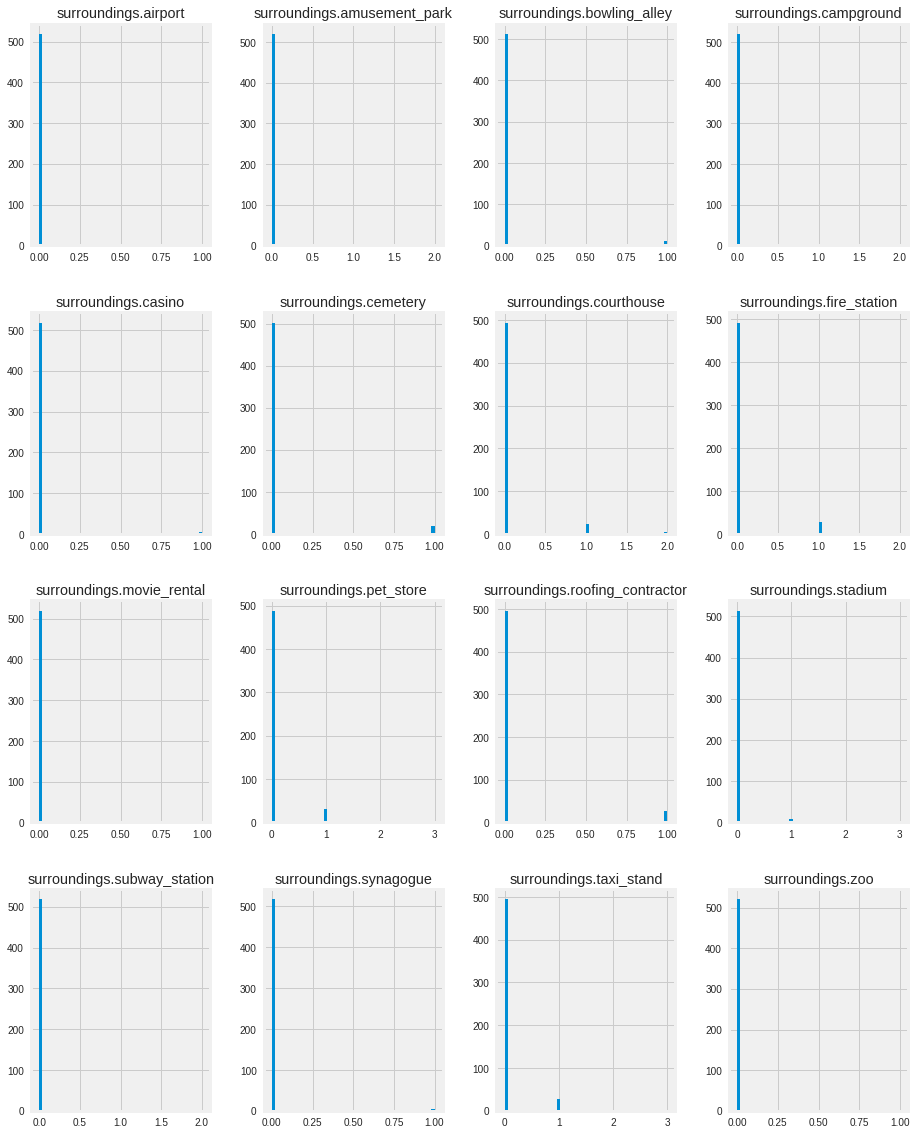

In [80]:
%matplotlib inline  
ads3_filtered.loc[:,drop_list1].hist(bins = 50 , figsize = (14,20))
plt.show()

In [81]:
ads_train2.shape

(417, 105)

## 6.2 Correlation based feature selection

In [0]:
#Correlation map to see how features are correlated with target variable avgWeeklysales
corr_df = ads_train2[ads_train2.columns[6:79]]
corrmat = corr_df.corr()
corr_df = corrmat.loc[:,'number_of_surroundings'].to_frame()
corr_df_s = corr_df.sort_values('number_of_surroundings',ascending = False)
corr_df_s2 = corr_df_s[corr_df_s['number_of_surroundings']>0.7]
drop_list2 = corr_df_s2.index.values.tolist()
drop_list2 = drop_list2[1:]

In [83]:
ads_train3 = ads_train2.drop(columns=drop_list2)
print(ads_train3.shape)

(417, 77)


In [0]:
def mosthighlycorrelated(mydataframe, numtoreport):
    # find the correlations
    cormatrix = mydataframe.corr()
    # set the correlations on the diagonal or lower triangle to zero,
    # so they will not be reported as the highest ones:
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    # find the top n correlations
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    # assign human-friendly names
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cormatrix.head(numtoreport)

In [85]:
#plot correlation matrix for indepedent variables
from string import ascii_letters
import seaborn as sns

sns.set(style="white")
# Compute the correlation matrix
ads_train3_X = ads_train3.iloc[:,6:]
correlation = ads_train3_X.corr()
mosthighlycorrelated(correlation, 20)

,FirstVariable,SecondVariable,Correlation
0,surroundings.bus_station,surroundings.transit_station,0.984679
1,Close_4,Close_5,0.972821
2,surroundings.moving_company,surroundings.storage,0.969761
3,City_main_Ticino,Mostlyspeaking_language_cell 48others,0.969617
4,Close_3,Close_4,0.965227
5,Close_3,Close_5,0.962100
6,Close_2,Close_5,0.959616
7,Close_2,Close_4,0.958493
8,Close_2,Close_3,0.957780
9,surroundings.shopping_mall,number_of_surroundings,0.933458


In [86]:
drop_list3 = [
'surroundings.bus_station','City_main_Ticino','Close_4','surroundings.moving_company','surroundings.locksmith',
'surroundings.electronics_store','surroundings.art_gallery','surroundings.department_store','surroundings.insurance_agency',
'surroundings.church','surroundings.florist','Close_1','Close_6','Close_2','Close_3','ratingtotal_per_review','surroundings.embassy',
'surroundings.car_dealer','Close_0','surroundings.lodging','Close_5','surroundings.shopping_mall','surroundings.movie_theater',
'surroundings.parking','surroundings.atm','surroundings.local_government_office','surroundings.museum','surroundings.laundry'
]
print(len(drop_list3))
ads_train4 = ads_train3.drop(columns=drop_list3)

28


In [87]:
ads_train4.shape

(417, 49)

In [88]:
# Compute the correlation matrix
ads_train4_X = ads_train4.iloc[:,6:]
correlation = ads_train4_X.corr()
mosthighlycorrelated(correlation, 20)

,FirstVariable,SecondVariable,Correlation
0,user_ratings_total,Mostlyspeaking_language_en,0.780996
1,surroundings.park,number_of_surroundings,0.780491
2,number_of_surroundings,user_ratings_total,0.776639
3,surroundings.library,number_of_surroundings,0.769124
4,number_of_surroundings,rating_per_review,-0.764867
5,City_main_Vaud,Mostlyspeaking_language_fr,0.761510
6,user_ratings_total,reviews_per_surrounding,0.756087
7,Mostlyspeaking_language_de,Mostlyspeaking_language_fr,-0.745884
8,surroundings.transit_station,number_of_surroundings,0.724586
9,reviews_per_surrounding,rating_per_review,-0.703219


## 6.3 Random Forest Feature Importance Selection

In [0]:
# y = ads_train2['avgWeeklysales'].reshape(-1, 1)
y = ads_train4['avgWeeklysales']
y=y.astype('int')
drop_list5 = ['sumWeeklysales','avgWeeklysales','avg_sales_days_perweek','target1','target2','target3']
X = ads_train4.drop(drop_list5,axis=1)

In [90]:
from sklearn.ensemble import RandomForestRegressor
importances_all = pd.DataFrame()

k=0
for i in range(1000):

    model = RandomForestRegressor()
    model.fit(X,y)

    importances = model.feature_importances_
    sorted_idx = np.argsort(importances)

    importances = pd.DataFrame(sorted(zip(map(lambda x: round(x, 4), model.feature_importances_), X.columns)))
    k+=1
    colnames = "importance_" + str(k)
    importances.columns = [colnames, "feature"]
    importances.set_index("feature", inplace=True)
#     importances = importances[importances.importance != 0.0]
#     importances = importances.sort_values("importance", ascending=False)
    importances_all = pd.concat([importances_all, importances], axis=1)

importances_all["features_mean"] = importances_all.mean(axis=1)
importances_all = importances_all.sort_values("features_mean", ascending=False)
importances_all.loc[:, ["features_mean"]]

,features_mean
City_main_Vaud,0.254403
avg_close_day,0.145277
Mostlyspeaking_language_fr,0.087708
rating,0.070171
rating_per_review,0.049218
reviews_per_surrounding,0.045588
user_ratings_total,0.042932
number_of_surroundings,0.034978
surroundings.transit_station,0.029056
surroundings.post_office,0.018167


In [0]:
worst_feature = importances_all[importances_all['features_mean']<0.015]
worst_score = worst_feature.index.tolist()

In [92]:
ads_train5 = ads_train4.drop(columns=worst_score)
ads_train5.shape

(417, 20)

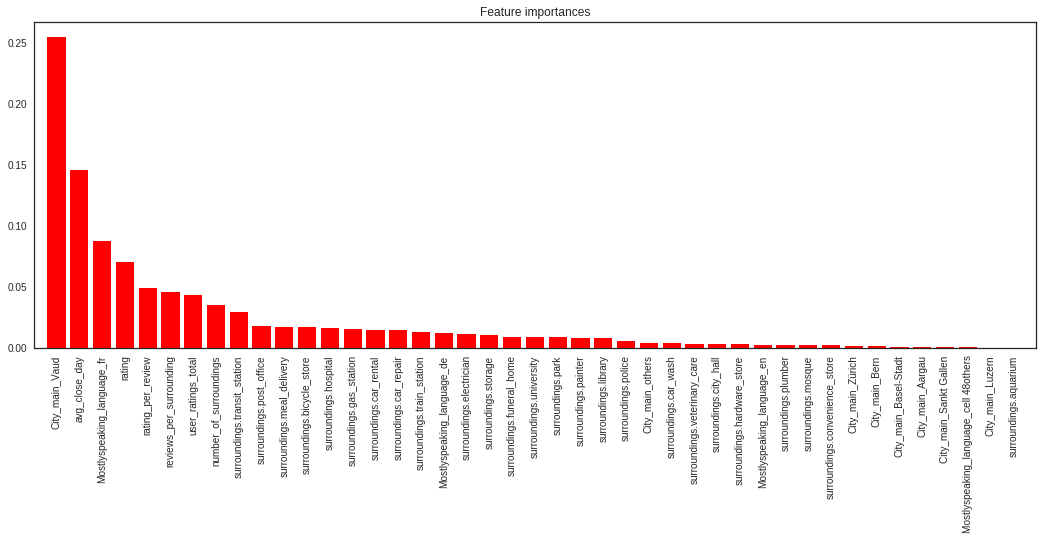

In [93]:
df = importances_all.loc[:, ["features_mean"]]
df['col'] = df.index
importances_all.index = df.index.tolist()  
# df.T.columns

# df['col'].tolist()

plt.figure(figsize=[16, 6])
plt.title("Feature importances")
plt.bar(range(len(importances_all)), importances_all.features_mean,
       color="r", align="center")
plt.xticks(range(len(importances_all)), importances_all.index, rotation='vertical')
plt.xlim([-1, len(importances_all)])
plt.show()


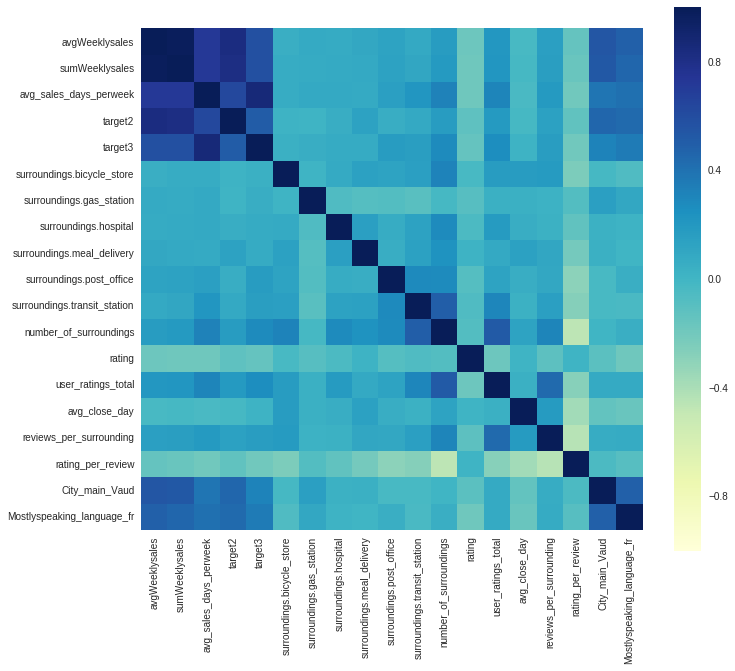

In [94]:
#Correlation map to see how features are correlated with target variable avgWeeklysales
corrmat = ads_train5.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corrmat,square=True, cmap="YlGnBu");

## 6.4 Feature Scaling

**Using standarscaler function to standardize the data and make sure the test data also standardized based on training data mean.**

In [0]:
# Align the training and testing data, keep only columns present in both dataframes
ads_train5, strat_test_set = ads_train5.align(strat_test_set, join = 'inner', axis = 1)

In [0]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(ads_train5.iloc[:,6:])
ads_train5_scale = scaler.transform(ads_train5.iloc[:,6:])

strat_test_set_scale = scaler.transform(strat_test_set.iloc[:,6:])


# 7. Modeling

## 7.1 Modeling dataset

In [0]:
def display_scores(scores):
    print ('\nScores', scores)
    print ('\nMean',scores.mean())
    print ('\nStd',scores.std())

In [98]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import r2_score

X_train=ads_train5_scale
y_train=ads_train5.avgWeeklysales
X_test=strat_test_set_scale
y_test=strat_test_set.avgWeeklysales
features=ads_train5.iloc[:,6:].columns.tolist()


print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
# print(len(features))
# X_train

(417, 14) (417,)
(105, 14) (105,)


In [0]:
# y_train.head()

## 7.2 Model Comparison

In [0]:
#Validation function
n_folds = 6
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train)
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="mean_squared_error", cv = kf))
    return(rmse)

def r2_score_result(model):
#     model.fit(X_train,y_train)
    pred_test = model.predict(X_test)
    r2_score_result = r2_score(y_test,pred_test)
    rmse = np.sqrt(sklearn.metrics.mean_squared_error(y_test,pred_test))
    print ('\nRMSE:',rmse)
    plt.scatter(y_test, pred_test)
    plt.xlabel('Observed')
    plt.ylabel('Predicted')
    plt.title('Scatter plot of observered vs predicted values')
    return(r2_score_result)

In [0]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
lasso = Lasso(alpha=0.1)
DT = DecisionTreeRegressor(max_depth=2)
rf = RandomForestRegressor(n_estimators=50,random_state=0)
clf = Ridge(alpha=1.0)


Lasso picked 14 variables and eliminated the other 0 variables


Text(0.5,1,'Coefficients in the Lasso Model')

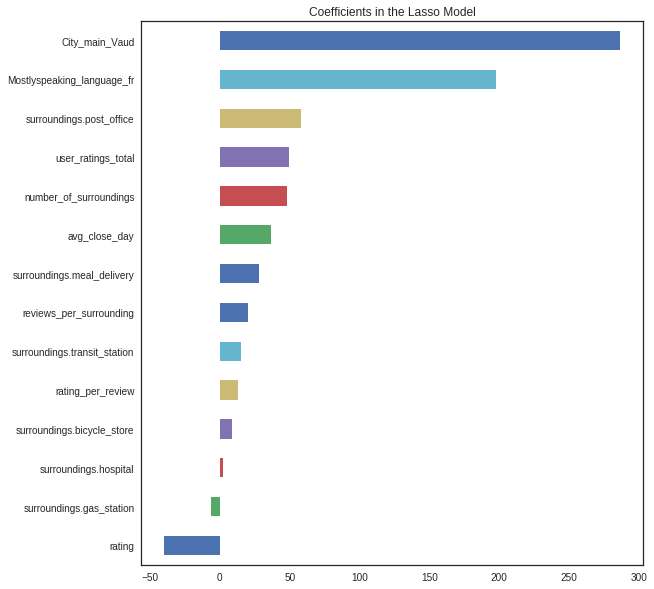

In [108]:
lasso.fit(X_train,y_train)
coef = pd.Series(lasso.coef_,index = features)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
coef.sort_values().plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

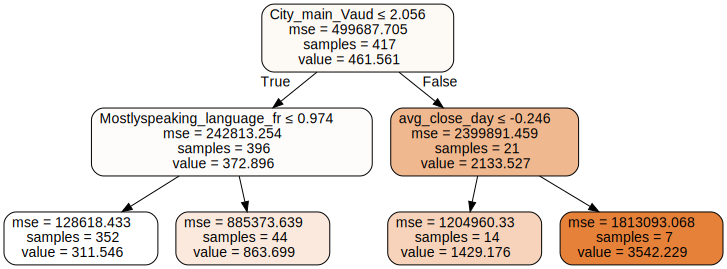

In [111]:
DT.fit(X_train,y_train)
dot_data = sklearn.tree.export_graphviz(DT, out_file=None, 
                         feature_names=features,
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [113]:
importances_all = pd.DataFrame()
k=0
for i in range(1000):
    rf.fit(X_train,y_train)

    importances = rf.feature_importances_
    sorted_idx = np.argsort(importances)

    importances = pd.DataFrame(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_),features)))
    k+=1
    colnames = "importance_" + str(k)
    importances.columns = [colnames, "feature"]
    importances.set_index("feature", inplace=True)
#     importances = importances[importances.importance != 0.0]
#     importances = importances.sort_values("importance", ascending=False)
    importances_all = pd.concat([importances_all, importances], axis=1)

importances_all["features_mean"] = importances_all.mean(axis=1)
importances_all = importances_all.sort_values("features_mean", ascending=False)
important_list = importances_all.index.values.tolist()
importances_all.loc[:, ["features_mean"]]

,features_mean
feature,
City_main_Vaud,0.2548
avg_close_day,0.1556
Mostlyspeaking_language_fr,0.1018
rating,0.0929
user_ratings_total,0.0719
rating_per_review,0.0646
reviews_per_surrounding,0.0521
number_of_surroundings,0.0403
surroundings.transit_station,0.0344


In [117]:
score = rmsle_cv(lasso)
print("Lasso score: {:.4f} ({:.4f})".format(score.mean(), score.std()))
score = rmsle_cv(clf)
print("Ridge score: {:.4f} ({:.4f})".format(score.mean(), score.std()))
score = rmsle_cv(DT)
print("DecisionTreeRegressor score: {:.4f} ({:.4f})".format(score.mean(), score.std()))
score = rmsle_cv(rf)
print("RandomForestRegressor score: {:.4f} ({:.4f})".format(score.mean(), score.std()))


Lasso score: 546.2259 (157.5748)
Ridge score: 546.0874 (157.6742)
DecisionTreeRegressor score: 591.8548 (133.9684)
RandomForestRegressor score: 602.2745 (155.8490)


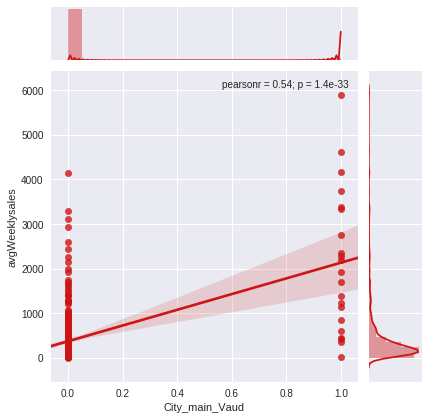

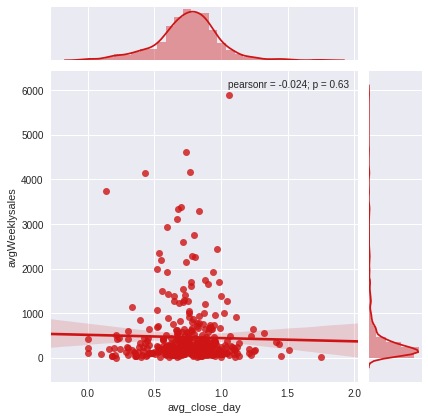

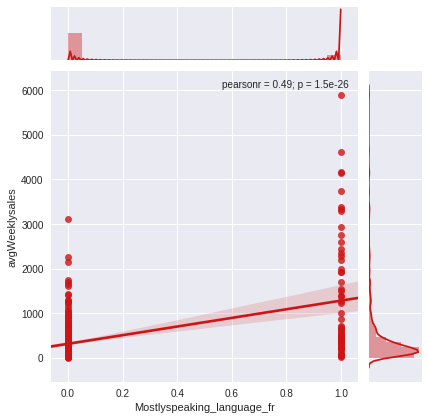

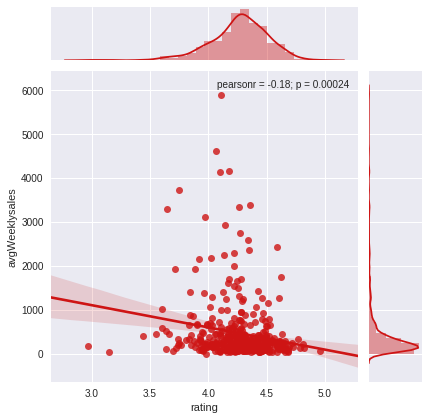

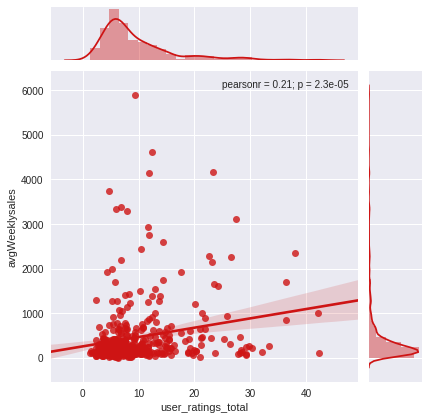

In [114]:
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)
for var in important_list[:5]:
    sns.jointplot(ads_train5.loc[:,var], ads_train5.avgWeeklysales, kind="regg", color="#ce1414")

## 7.3 Model Evaluation

**R2 scores and scatter plot of observed vs predicted values based on test dataset**


RMSE: 825.6020405474221
Lasso R2: 0.3284277921810086


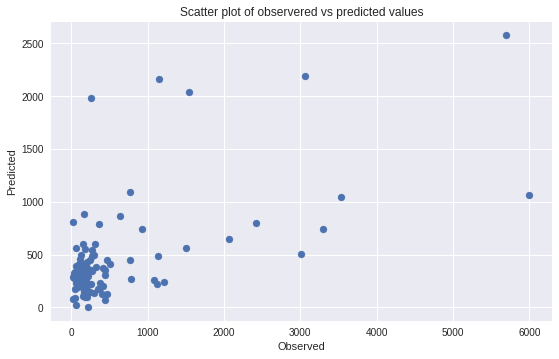

In [131]:
print ('Lasso R2:',r2_score_result(lasso))


RMSE: 825.6278801826509
Ridge R2: 0.32838575388268365


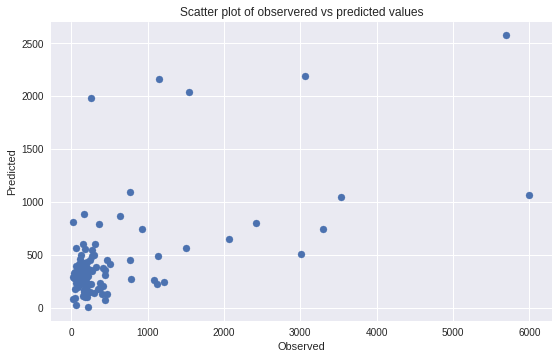

In [132]:

print ('Ridge R2:',r2_score_result(clf))


RMSE: 816.9345003463087
DecisionTree R2: 0.3424547052120719


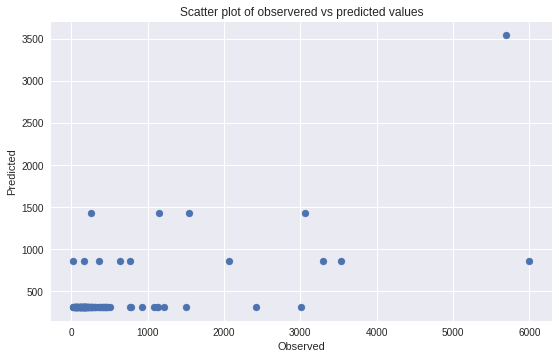

In [133]:
print ('DecisionTree R2:',r2_score_result(DT))


RMSE: 800.0981170433137
RandamForest R2: 0.3692784114624664


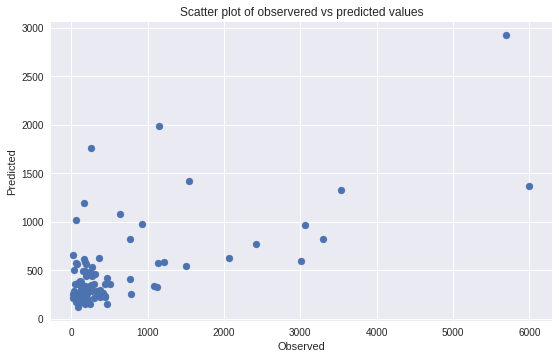

In [134]:

print ('RandamForest R2:',r2_score_result(rf))
